<a href="https://colab.research.google.com/github/ThRahmani/TA-Probability1-Distributions-Notebook/blob/main/probability1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, pi
from scipy.special import gamma, beta, comb

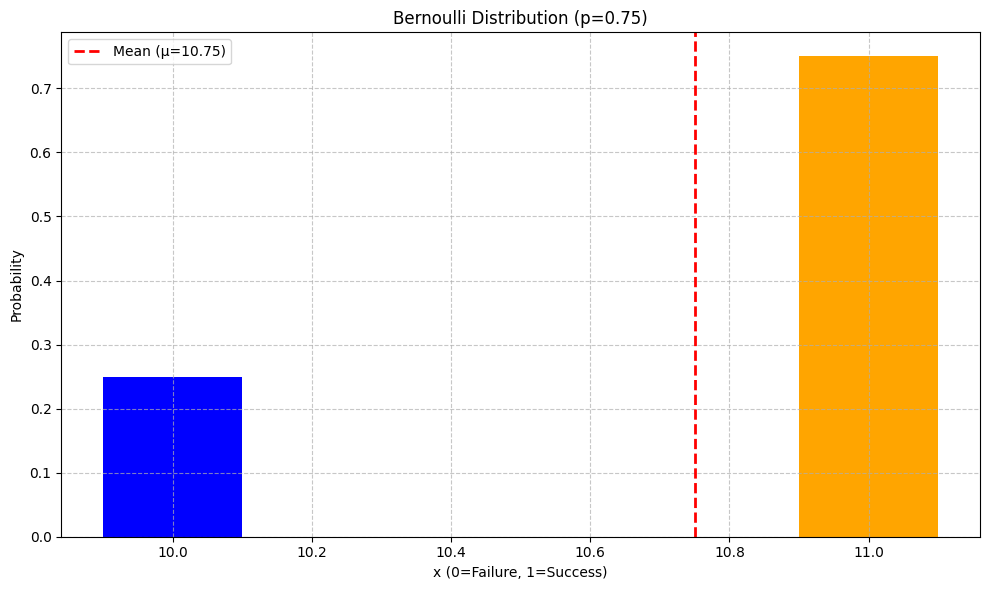

In [ ]:
 class Bernoli:
    def __init__(self, teta, p: [0,1]):
        self.p = p
        self.teta = teta

    def pmf(self, x:{0, 1}):
        return self.p**x*(1-self.p)**(1-x)

    def mean(self):
        return self.p+self.teta

    def variance(self):
        return self.p*(1-self.p)

    def graph(self):
        x_values = [0+self.teta, 1+self.teta]
        probabilities = [self.pmf(0), self.pmf(1)]

        plt.figure(figsize=(10, 6))
        plt.bar(x_values, probabilities, color=['blue', 'orange'], width=0.2)
        plt.title(f'Bernoulli Distribution (p={self.p})')
        plt.xlabel('x (0=Failure, 1=Success)')
        plt.ylabel('Probability')


        # نمایش میانگین (خط عمودی)
        mean = self.mean()
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')


        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.legend()


X1 = Bernoli(10, 0.75)
X1.graph()


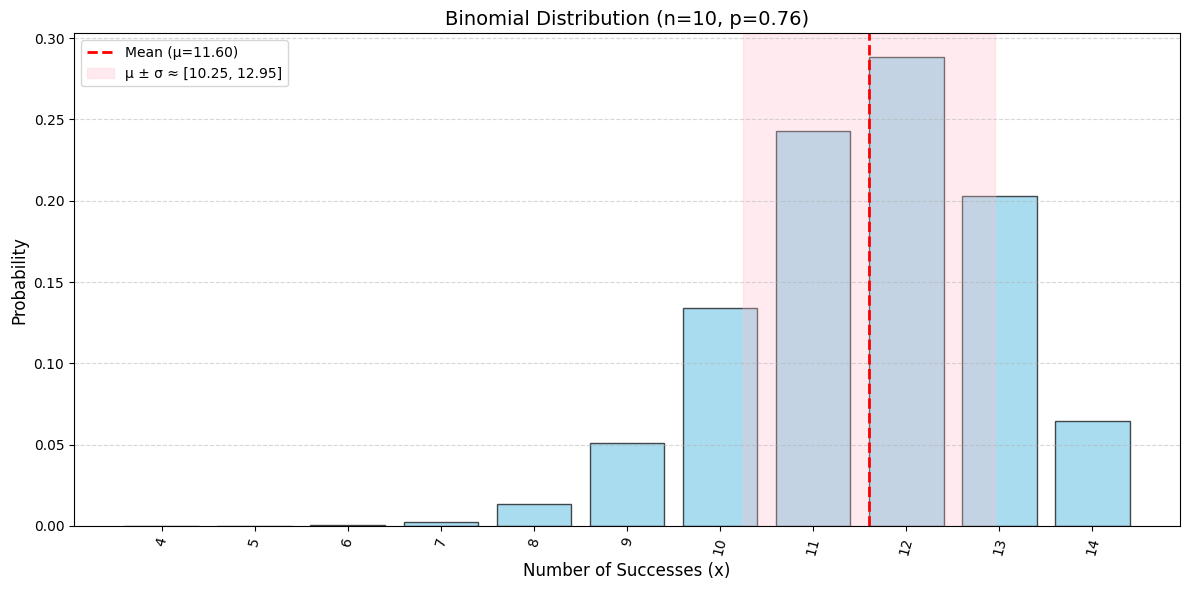

In [ ]:
class Binomial:
    def __init__(self, teta, n: int, p: [0,1]):
        self.n = n
        self.p = p
        self.teta = teta

    def pmf(self, x: int):
        return comb(self.n, x) * self.p**x * (1 - self.p)**(self.n - x)

    def mean(self):
        return self.n * self.p + self.teta

    def variance(self):
        return self.n * self.p * (1 - self.p)

    def graph(self):
        x_values = np.arange(0 + self.teta, self.n + 1 + self.teta)
        probabilities = [self.pmf(x - self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = var**0.5

        plt.figure(figsize=(12, 6))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Binomial Distribution (n={self.n}, p={self.p})', fontsize=14)
        plt.xlabel('Number of Successes (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)

        # تنظیمات محور x:
        plt.xticks(
            ticks=x_values,
            rotation=75,
            fontsize=10
        )

        # نمایش میانگین و بازه μ ± σ
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.legend()

# مثال:
X2 = Binomial(4, 10, 0.76)
X2.graph()


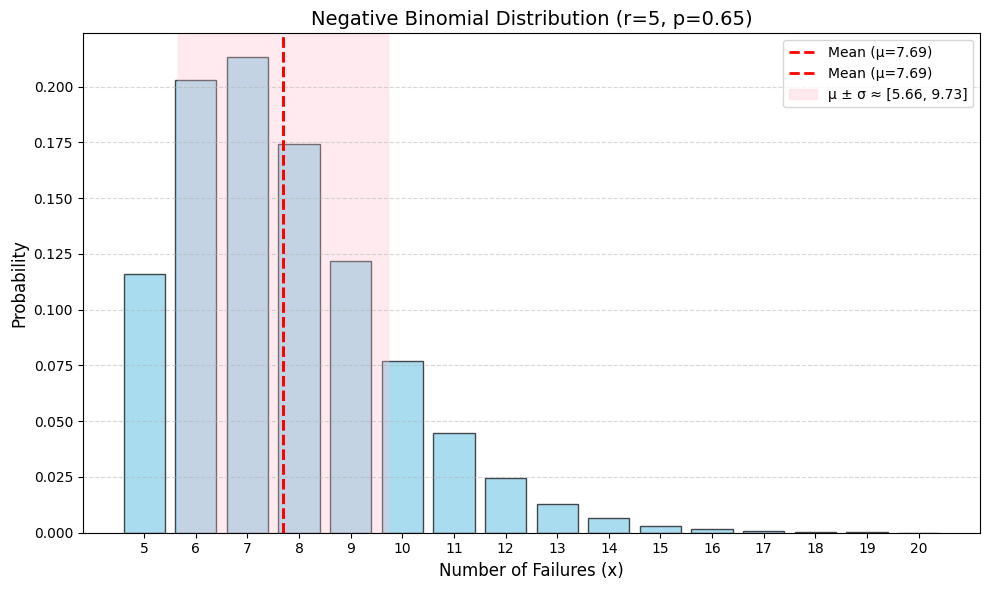

In [ ]:
class NegativeBinomial:
    def __init__(self,teta, r: int, p: float):
        self.r = r
        self.p = p
        self.teta = teta

    def pmf(self, x: int):

        return comb(x + self.r - 1, self.r - 1) * (self.p ** self.r) * ((1 - self.p) ** x)

    def mean(self):

        return self.r * (1 - self.p) / self.p + self.teta

    def variance(self):

        return self.r * (1 - self.p) / (self.p ** 2)

    def graph(self, min_prob: float = 0.0001):
        x_max = 0
        while self.pmf(x_max) >= min_prob:
          x_max += 1

        x_values = np.arange(0+self.teta, x_max + 1+self.teta)
        probabilities = [self.pmf(x-self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)


        plt.figure(figsize=(10, 6))
        bars = plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Negative Binomial Distribution (r={self.r}, p={self.p})', fontsize=14)
        plt.xlabel('Number of Failures (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')

        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.xticks(x_values)
        plt.tight_layout()
        plt.legend()




X3 = NegativeBinomial(teta =5 ,r=5, p=0.65)
X3.graph()


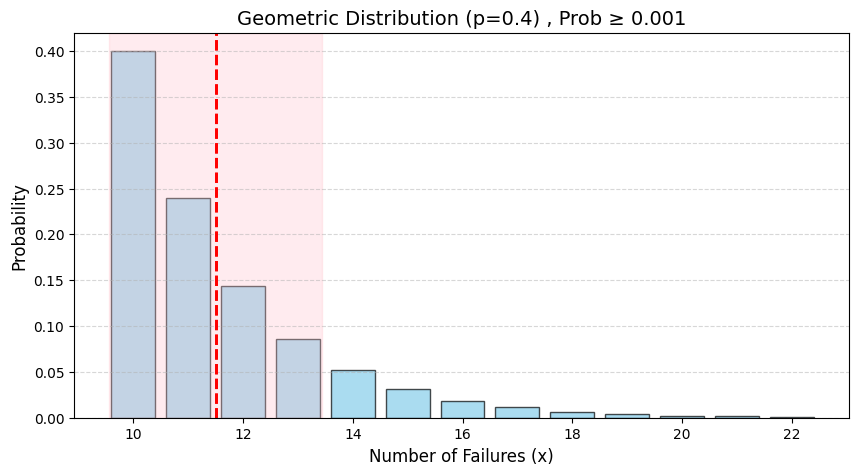

In [ ]:
class Geometric:
    def __init__(self, teta, p: float):
        self.p = p
        self.teta = teta

    def pmf(self, x: int):
        return self.p * (1 - self.p) ** x

    def mean(self):
        return (1 - self.p) / self.p + self.teta

    def variance(self):
        return (1 - self.p) / (self.p ** 2)

    def graph(self, min_prob: float = 0.005):

        x_max = 0
        while self.pmf(x_max) >= min_prob:
            x_max += 1


        x_values = np.arange(0+self.teta, x_max + 1+self.teta)
        probabilities = [self.pmf(x-self.teta) for x in x_values]

        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        plt.figure(figsize=(10, 5))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Geometric Distribution (p={self.p}) , Prob ≥ {min_prob}', fontsize=14)
        plt.xlabel('Number of Failures (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)


        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')



        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')


        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

# مثال:
X4 = Geometric(10,0.4)
X4.graph(min_prob=0.001)


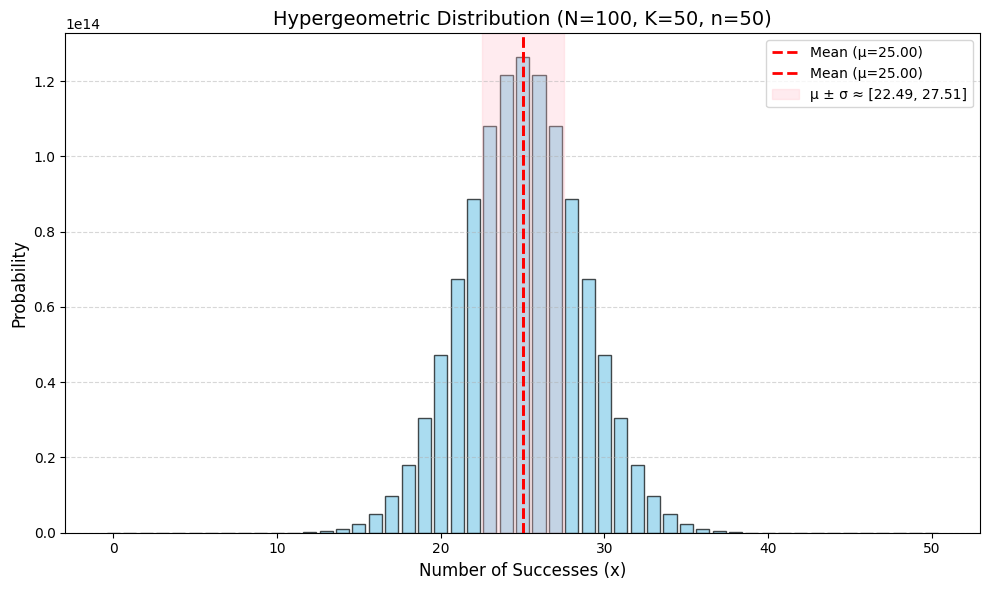

In [ ]:
class Hypergeometric:
    def __init__(self,teta, N: int, K: int, n: int):
        self.N = N  #اعضای کل جامعه
        self.K = K  #کوچکتر از N
        self.n = n  #کوچکتر از N
        self.teta = teta

    def pmf(self, x: int):
        return comb(self.K, x) * comb(self.N - self.K, self.n)

    def mean(self):
        return self.n * (self.K / self.N) + self.teta

    def variance(self):
        return self.n * (self.K / self.N) * (1 - self.K / self.N) * ((self.N - self.n) / (self.N - 1))

    def graph(self):
        x_values = np.arange(max(0, self.n - (self.N - self.K)) + self.teta, min(self.K, self.n) + 1 + self.teta)  # محدوده
        probabilities = [self.pmf(x-self.teta) for x in x_values]
        mean = self.mean()
        var = self.variance()
        std = np.sqrt(var)

        # تنظیمات نمودار
        plt.figure(figsize=(10, 6))
        plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'Hypergeometric Distribution (N={self.N}, K={self.K}, n={self.n})', fontsize=14)
        plt.xlabel('Number of Successes (x)', fontsize=12)
        plt.ylabel('Probability', fontsize=12)


        # نمایش میانگین (خط عمودی)
        mean = self.mean()
        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')

        plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean (μ={mean:.2f})')
        lower = mean - std
        upper = mean + std
        plt.axvspan(lower, upper, color='pink', alpha=0.3, label=f'μ ± σ ≈ [{lower:.2f}, {upper:.2f}]')



        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()

X5 = Hypergeometric(0, 100,50,50)
X5.graph()
